# Faster R-CNN based Image Classification

In [1]:
# For running inference on the TF-Hub module.
import tensorflow as tf
import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time


c:\Users\gram\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
frcnn_module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

In [3]:
frcnn_model = hub.load(frcnn_module_handle)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [4]:
frcnn_detector = frcnn_model.signatures['default']

In [6]:
def display_image(image,k):
    fig = plt.figure(figsize=(26, 25))
    plt.subplot(4,3,k+1)
    plt.grid(False)
    plt.axis('off')
    plt.imshow(image)

def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size
    
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)
    
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

    display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
    total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

    if top > total_display_str_height:
        text_bottom = top
    else:
        text_bottom = top + total_display_str_height
        
    for display_str in display_str_list[::-1]:
        text_width, text_height = font.getsize(display_str)
        margin = np.ceil(0.05 * text_height)
        draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                        (left + text_width, text_bottom)],
                       fill=color)
        draw.text((left + margin, text_bottom - text_height - margin),
                  display_str,
                  fill="black",
                  font=font)
        text_bottom -= text_height - 2 * margin


def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
    colors = list(ImageColor.colormap.values())

    try:
        font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
    except IOError:
        print("Font not found, using default font.")
        font = ImageFont.load_default()

    for i in range(min(boxes.shape[0], max_boxes)):
        if scores[i] >= min_score:
            ymin, xmin, ymax, xmax = tuple(boxes[i])
            display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                         int(100 * scores[i]))
            color = colors[hash(class_names[i]) % len(colors)]
            image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
            draw_bounding_box_on_image(image_pil,
                                       ymin,
                                       xmin,
                                       ymax,
                                       xmax,
                                       color,
                                       font,
                                       display_str_list=[display_str])
            np.copyto(image, np.array(image_pil))
        
    return image

In [7]:
def load_img(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    
    return img

def run_detector(detector, path,k):
    img = load_img(path)

    converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

    start_time = time.time()
    result = detector(converted_img)
    end_time = time.time()

    result = {key:value.numpy() for key,value in result.items()}

    print("Found %d objects." % len(result["detection_scores"]))
    print("Inference time: ", end_time-start_time)

    image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

    display_image(image_with_boxes,k)

Found 100 objects.
Inference time:  77.22467827796936
Font not found, using default font.
Found 100 objects.
Inference time:  41.22212767601013
Font not found, using default font.
Found 100 objects.
Inference time:  44.00360059738159
Font not found, using default font.
Found 100 objects.
Inference time:  43.04793977737427
Font not found, using default font.
Found 100 objects.
Inference time:  49.71240520477295
Font not found, using default font.
Found 100 objects.
Inference time:  69.52947402000427
Font not found, using default font.
Found 100 objects.
Inference time:  57.596986293792725
Font not found, using default font.
Found 100 objects.
Inference time:  48.474282026290894
Font not found, using default font.
Found 100 objects.
Inference time:  43.227017879486084
Font not found, using default font.


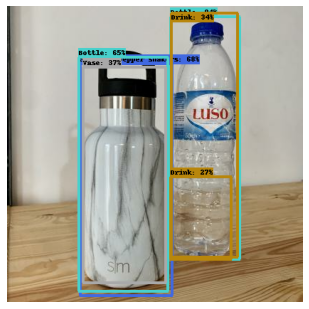

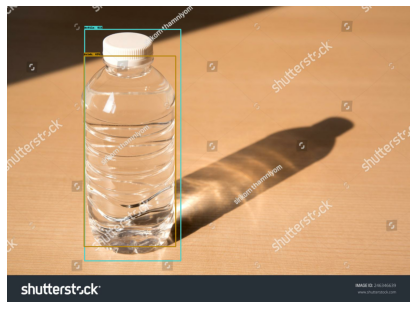

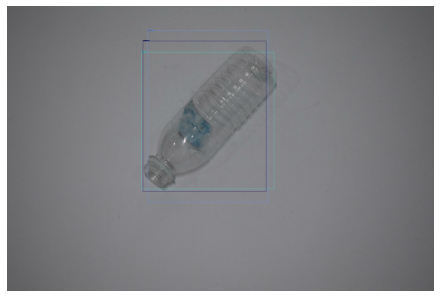

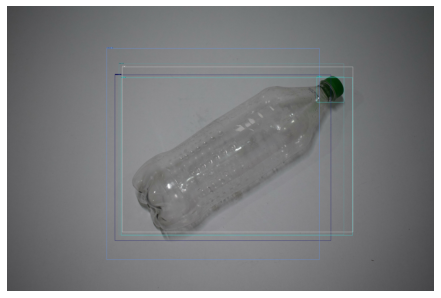

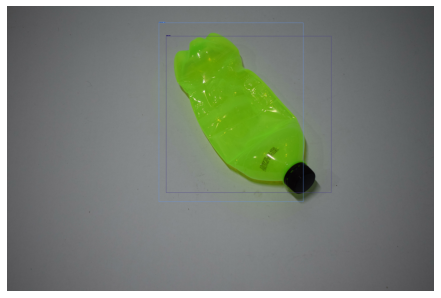

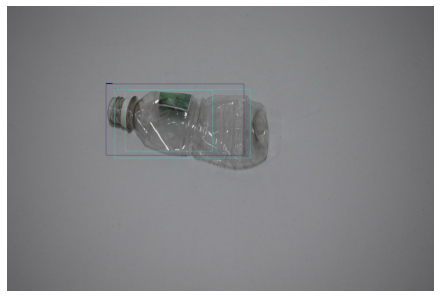

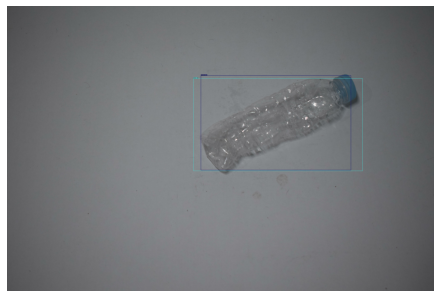

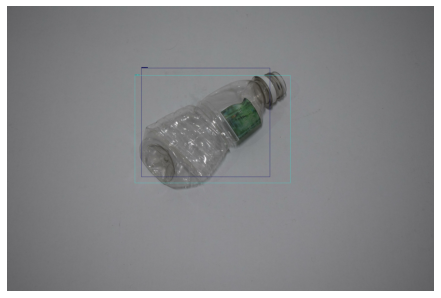

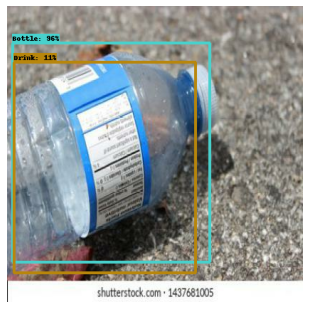

In [11]:
paths = ['Plastic Bottle Image Dataset/train/images/100027_jpg.rf.066e125d410f77f20772418b80d4c720.jpg',
'Plastic Bottle Image Dataset/test/images/700009_jpg.rf.c477a347a7929a3fda5db8cc1231a1f3.jpg',
'Plastic Bottle Image Dataset/test/images/bottle-13-_JPG.rf.a54cae09862f57bb10f2453be8b533ff.jpg',
'Plastic Bottle Image Dataset/test/images/bottle-337-_JPG.rf.3dd4184ca8afbc7d3ad179bfbbeb3a98.jpg',
'Plastic Bottle Image Dataset/test/images/bottle-516-_JPG.rf.c17805bce634e625a3f4a82e738b6e38.jpg',
'Plastic Bottle Image Dataset/test/images/bottle-33-_JPG.rf.93b0eef05c23a82b0391b9bb5ad6d4b2.jpg',
'Plastic Bottle Image Dataset/test/images/bottle-498-_JPG.rf.632f91f6511defb084c612127d4edfb8.jpg',
'Plastic Bottle Image Dataset/test/images/bottle-36-_JPG.rf.6afde7761b80039c82bfadf6a01b30d8.jpg',
'Plastic Bottle Image Dataset/test/images/700014_jpg.rf.c8bf507a2b96d1bfd79d15183793a49f.jpg']

for k,path in enumerate(paths):
    run_detector(frcnn_detector,path,k)

Found 100 objects.
Inference time:  38.681670904159546
Font not found, using default font.


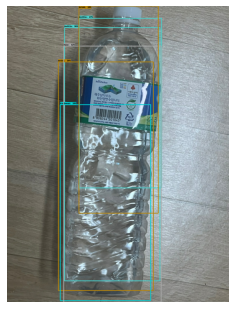

In [13]:
paths = ['C:/Users/gram/Desktop/삼다수.jpg']

for k,path in enumerate(paths):
    run_detector(frcnn_detector,path,k)